# Similarity Maps Examples

RDKit has a feature to generate similarity maps. A deeper dive into this tool has been published in the [Journal of Cheminformatics](https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-5-43). In short, this is a tool to visualize molecular fingerprints between two molecules. Tutorials can be found on how to genereate the images, such as [here](https://greglandrum.github.io/rdkit-blog/posts/2020-01-03-similarity-maps-with-new-drawing-code.html) and [here](https://iwatobipen.wordpress.com/2020/01/04/model-interporation-with-new-drawing-code-of-rdkit-rdkit-machine-learning-chemoinformatics/).

The Pharmacophore-Toolset wraps the code to help simplify the generation of the similarity maps.

## Import Modules and Data
Modules are imported as standard. For this tutorial, only the Draw submodule from the Pharmacophore-Toolkit will be needed. RDKit is only needed to draw the molecule from smiles. If users choose, RDKit can be replaced with [Datamol](https://docs.datamol.io/stable/index.html).

Similarly to the [pharmacophore_tutorial](pharmacophore_tutorial.ipynb), three 5-HT2A agonists will be used - [serotonin](https://en.wikipedia.org/wiki/Serotonin), [psilocin](https://en.wikipedia.org/wiki/Psilocin), and [mescaline](https://en.wikipedia.org/wiki/Mescaline).

In [1]:
from rdkit import Chem
from pharmacophore import Draw

# render molecules as RDKit object
serotonin = Chem.MolFromSmiles("C1=CC2=C(C=C1O)C(=CN2)CCN")
psilocin =  Chem.MolFromSmiles("CN(C)CCc1c[nH]c2cccc(O)c12")
mescaline = Chem.MolFromSmiles("O(c1cc(cc(OC)c1OC)CCN)C")

### Check
OPTIONAL: Check output/rendering of molecule.

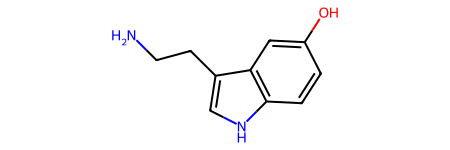

In [2]:
serotonin

## Draw Similarity Maps

In the pharmacophore module, the similarity_maps method is called from the Draw submodule. Only two params are required: a molecule for reference (refmol) and a molecule for comparison (querymol). Currently the similarity_maps only accepts morgan fingerprints. Default params are set as a radius=2 and nbits=2048.

In the first example, serotonin will be compared to itself. As a result, the image will show no difference in similarity (all green)/.

[15:36:20] DEPRECATION WARNING: please use MorganGenerator


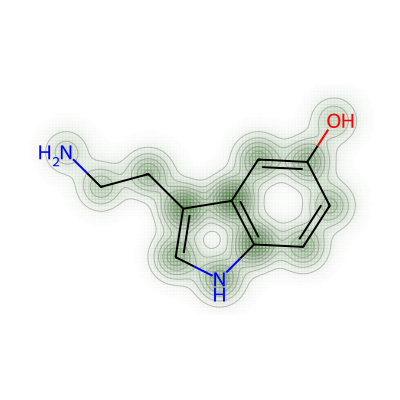

In [3]:
draw = Draw()
img = draw.similarity_maps(refmol=serotonin, querymol=serotonin)
img.save('../img/serotonin.png')
img

In the second example, psilocin is compared to serotonin. The image here is different, with the amine moeity of psilocin highlighted in pink. This signifies larger differences between the two molecules. Removing the amine moiety of psilocin could potentially increase similarity to serotonin.


[15:36:20] DEPRECATION WARNING: please use MorganGenerator
[15:36:20] DEPRECATION WARNING: please use MorganGenerator


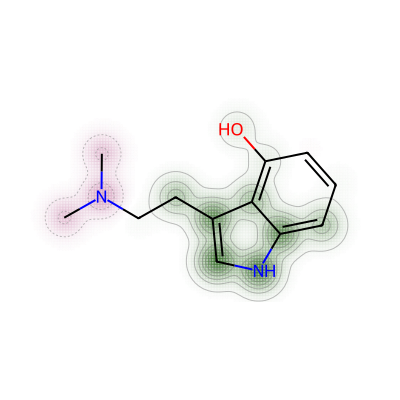

In [4]:
draw = Draw()
img = draw.similarity_maps(serotonin, psilocin)
img.save('../img/psilocin.png')
img

Comparing mescaline to serotonin shows a similar fingerprint, with pink highlights to the methoxy moieties.


[15:36:20] DEPRECATION WARNING: please use MorganGenerator
[15:36:20] DEPRECATION WARNING: please use MorganGenerator


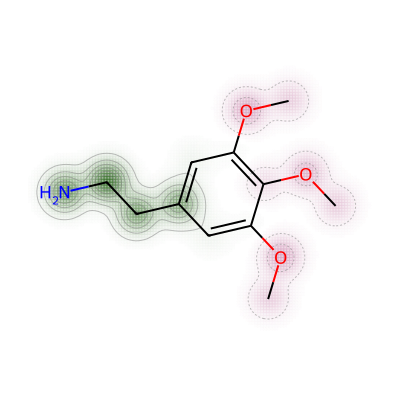

In [5]:
img = draw.similarity_maps(serotonin, mescaline)
img.save('../img/mescaline.png')
img